###1. Metadata
HOMEWORK: PROJECT OF STATISTICAL ANALYSIS FOR TABULAR DATA


- **school** (categorical): Student's school (Gabriel Pereira or Mousinho da Silveira).
- **sex** (categorical): Gender of the student (female or male).
- **age** (numerical): Age of the student (numeric).
- **address** (categorical): Type of address (urban or rural).
- **famsize** (categorical): Family size (LE3 or GT3).
- **Pstatus** (categorical): Parent's cohabitation status (T = living together; A = apart).
- **medu** (numerical): Mother's education (numeric: 0 to 4).
- **fedu** (numerical): Father's education (numeric: 0 to 4).
- **mjob** (categorical): Mother's job (teacher, health, civil, etc.).
- **fjob** (categorical): Father's job (teacher, health, civil, etc.).
- **reason** (categorical): Reason to choose this school (home, reputation, course, etc.).
- **guardian** (categorical): Student's guardian (mother, father, other).
- **traveltime** (numerical): Travel time to school (numeric: 1 to 4).
- **studytime** (numerical): Weekly study time (numeric: 1 to 4).
- **failures** (numerical): Number of past class failures (numeric: n if 1<=n<3; else 4).
- **schoolsup** (categorical): Extra educational support (yes or no).
- **famsup** (categorical): Family educational support (yes or no).
- **paid** (categorical): Extra paid classes within the course subject (yes or no).
- **activities** (categorical): Extra-curricular activities (yes or no).
- **nursery** (categorical): Attended nursery school (yes or no).
- **higher** (categorical): Wants to take higher education (yes or no).
- **internet** (categorical): Internet access at home (yes or no).
- **romantic** (categorical): With a romantic relationship (yes or no).
- **famrel** (numerical): Quality of family relationships (numeric: from 1 - very bad to 5 - excellent).
- **freetime** (numerical): Free time after school (numeric: from 1 - very low to 5 - very high).
- **goout** (numerical): Going out with friends (numeric: from 1 - very low to 5 - very high).
- **Dalc** (numerical): Workday alcohol consumption (numeric: from 1 - very low to 5 - very high).
- **Walc** (numerical): Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high).
- **health** (numerical): Current health status (numeric: from 1 - very bad to 5 - very good).
- **absences** (numerical): Number of school absences (numeric: from 0 to 93).
- **G1** (numerical): First period grade (numeric: from 0 to 20).
- **G2** (numerical): Second period grade (numeric: from 0 to 20).
- **G3** (numerical): Final grade (numeric: from 0 to 20).


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [37]:
column_names = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']


### 2. Load Dataset


In [38]:
dataset = pd.read_csv("data/student_mat.csv", names = column_names, sep = ";", skipinitialspace=True)
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


In [39]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  396
#Features =  33


In [82]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [41]:
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


Filtering missing values

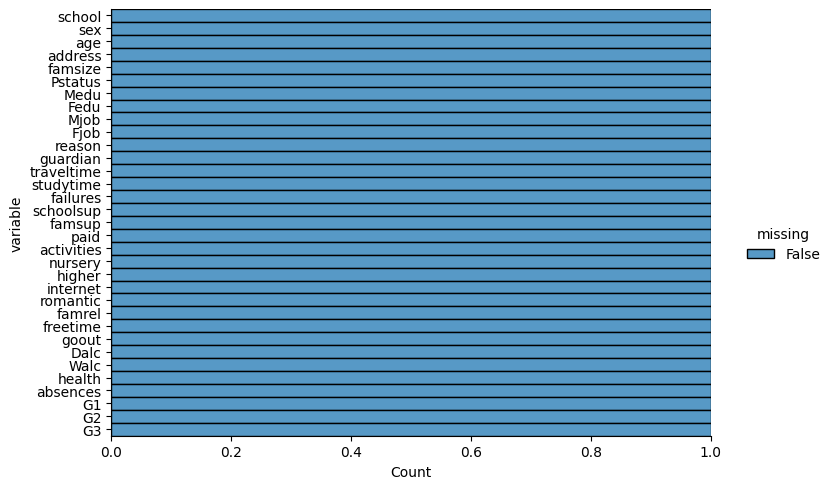

In [42]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)
plt.show()

In [43]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  396


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [44]:
numerical_cols = ["age", "Medu","Fedu", "traveltime", "studytime", "failures","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"]


Histogram with Frequencies

In [45]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

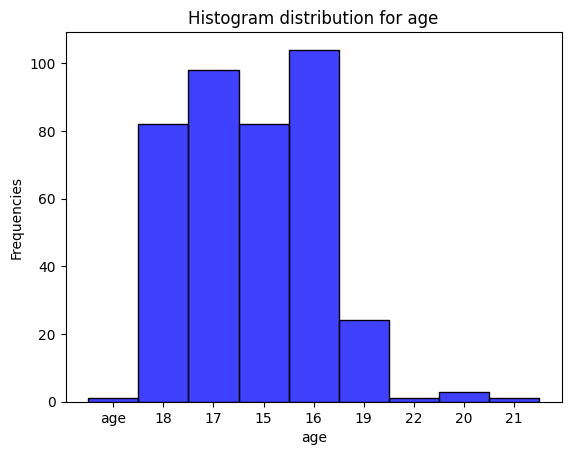

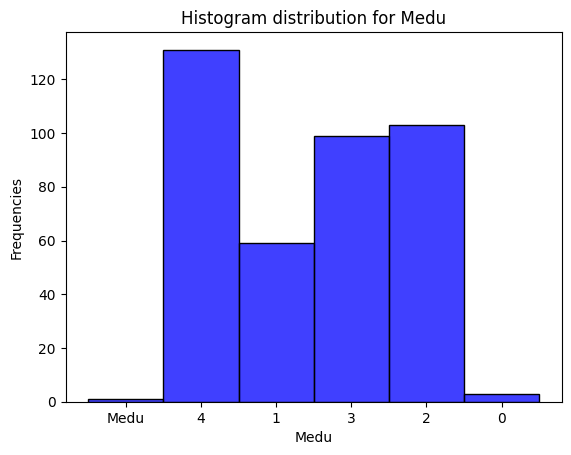

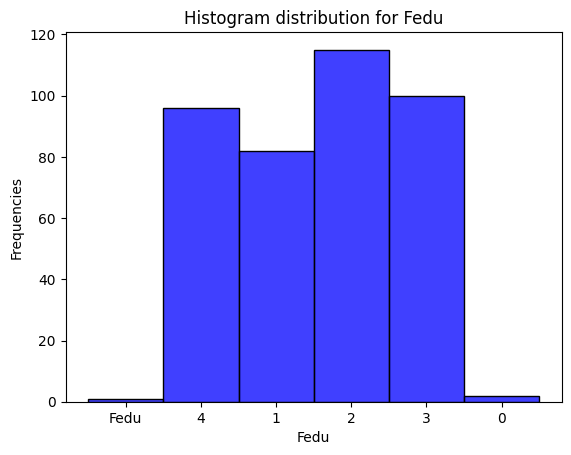

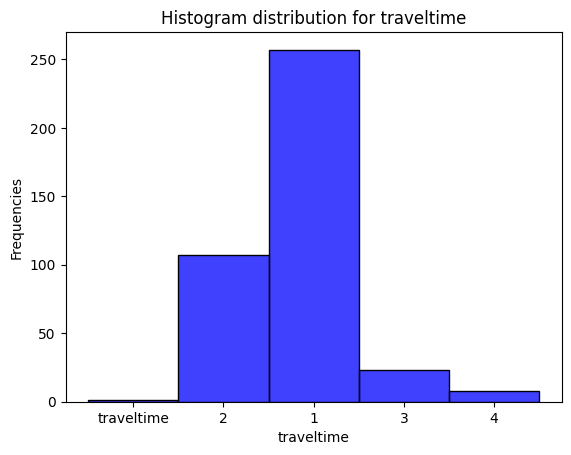

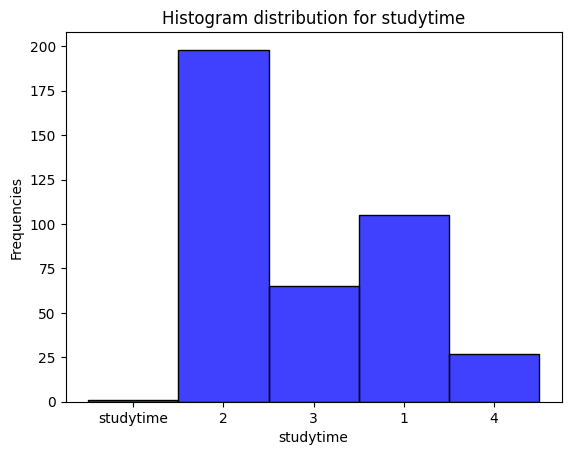

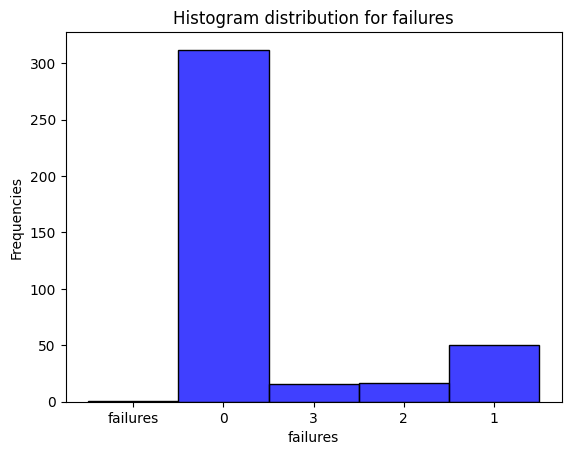

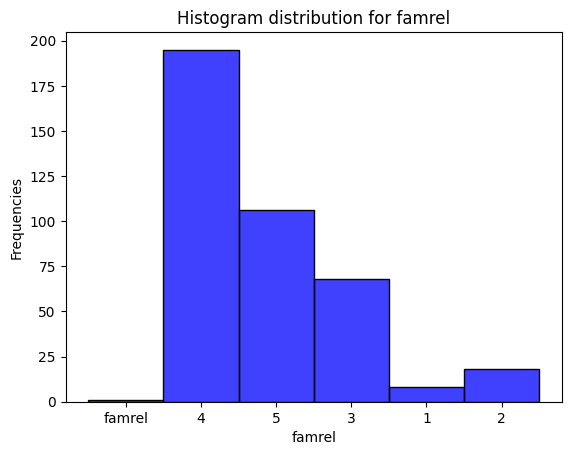

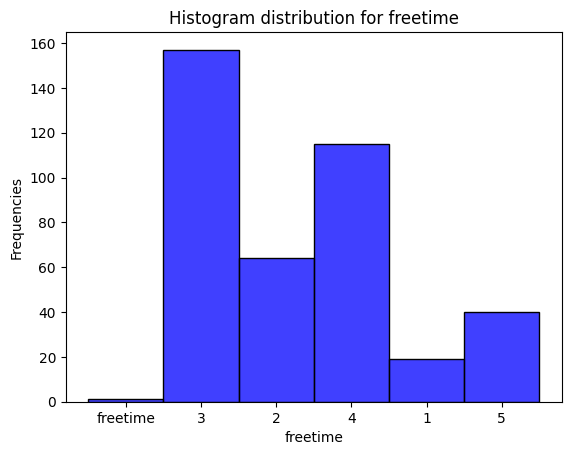

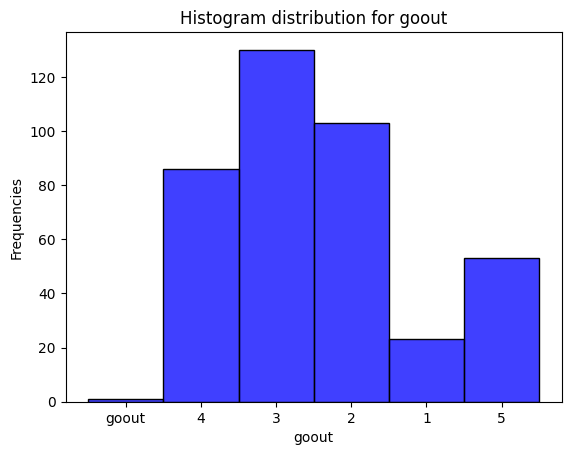

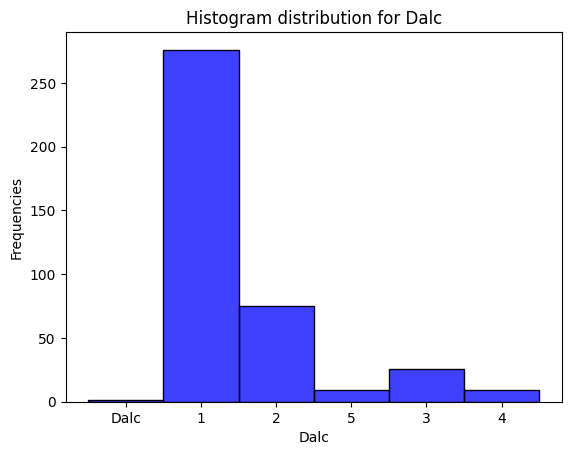

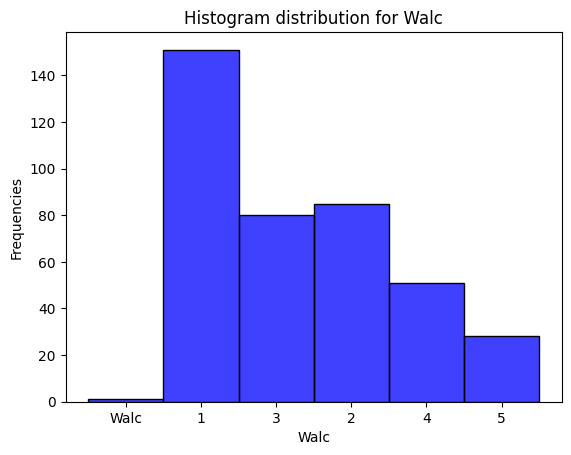

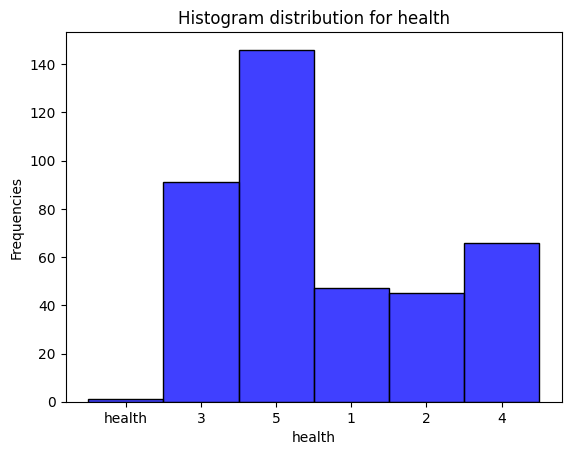

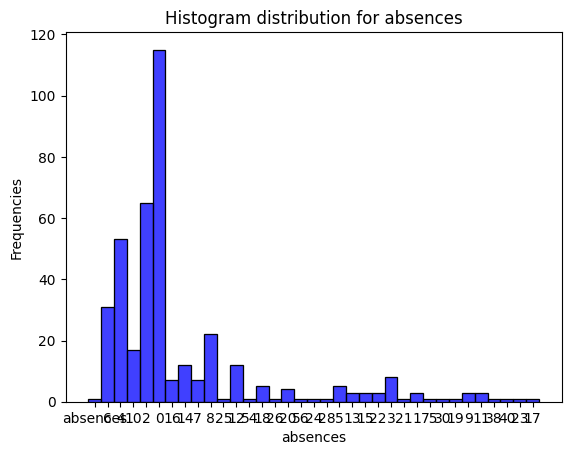

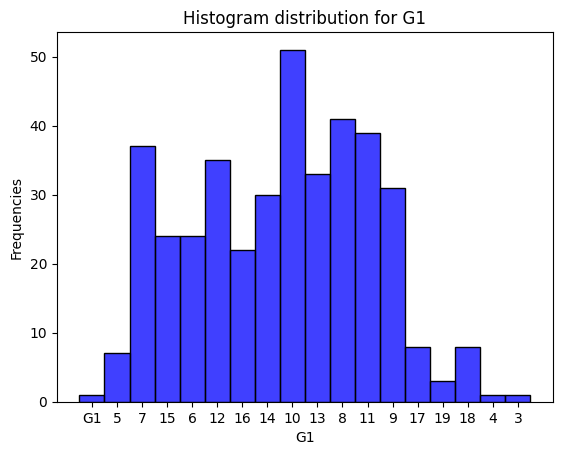

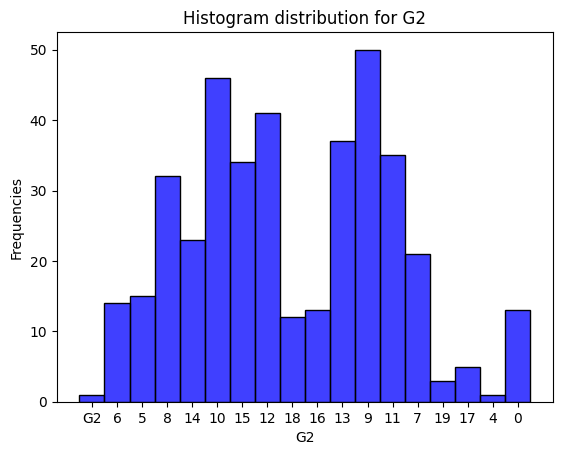

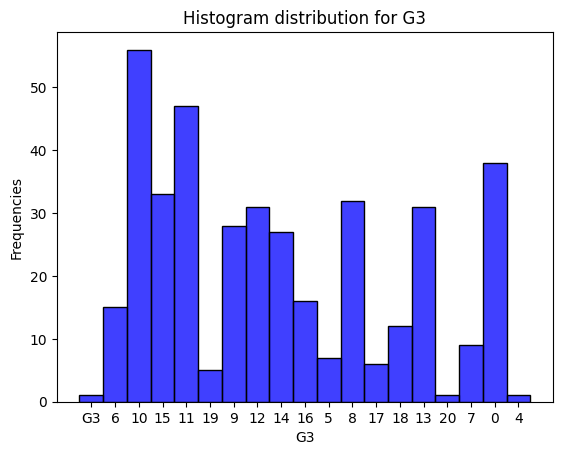

In [46]:

# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [49]:
# function to plot distribution for 1 numerical column
def plot_all_numerical_histograms(dataframe):
    for column in numerical_cols:
        plt.figure(figsize=(14, 6))

        # Frequency chart (left)
        plt.subplot(1, 2, 1)
        sbn.histplot(dataframe[column], kde=False, bins=30)
        plt.title(f"Histogram of Frequencies for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        # Density chart (right)
        plt.subplot(1, 2, 2)
        sbn.histplot(dataframe[column], kde=True, stat="density", bins=30)
        plt.title(f"Histogram of Densities for {column}")
        plt.xlabel(column)
        plt.ylabel("Density")

        # Display charts
        plt.tight_layout()
        plt.show()


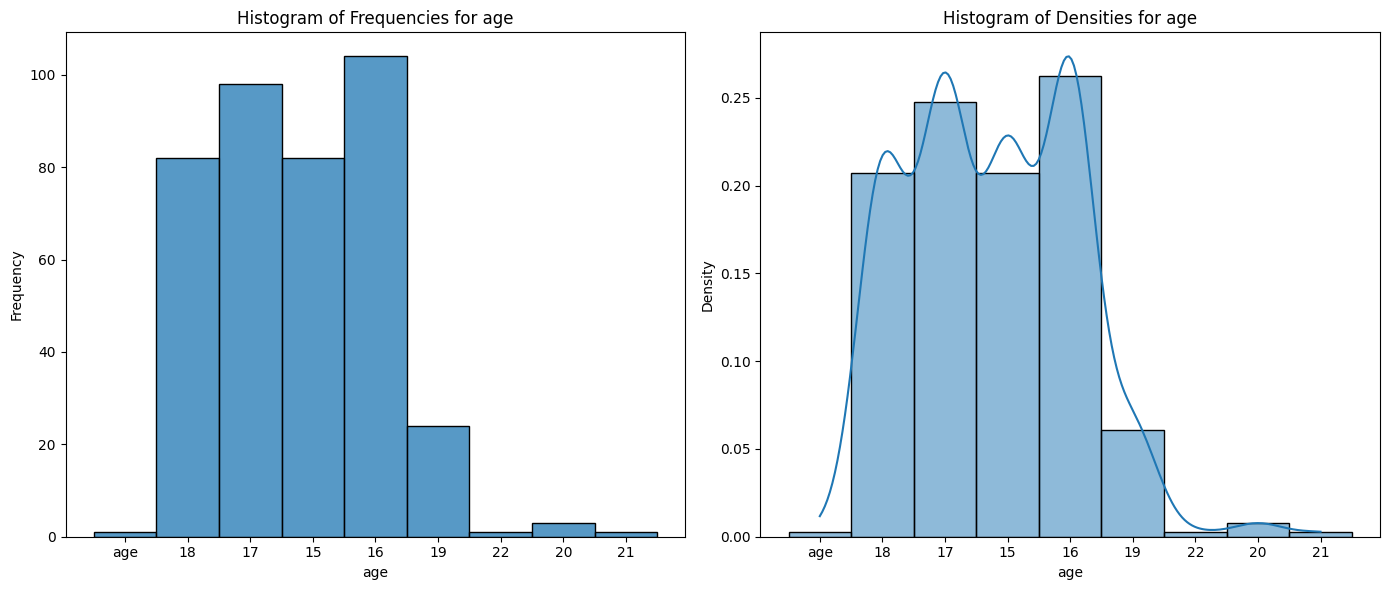

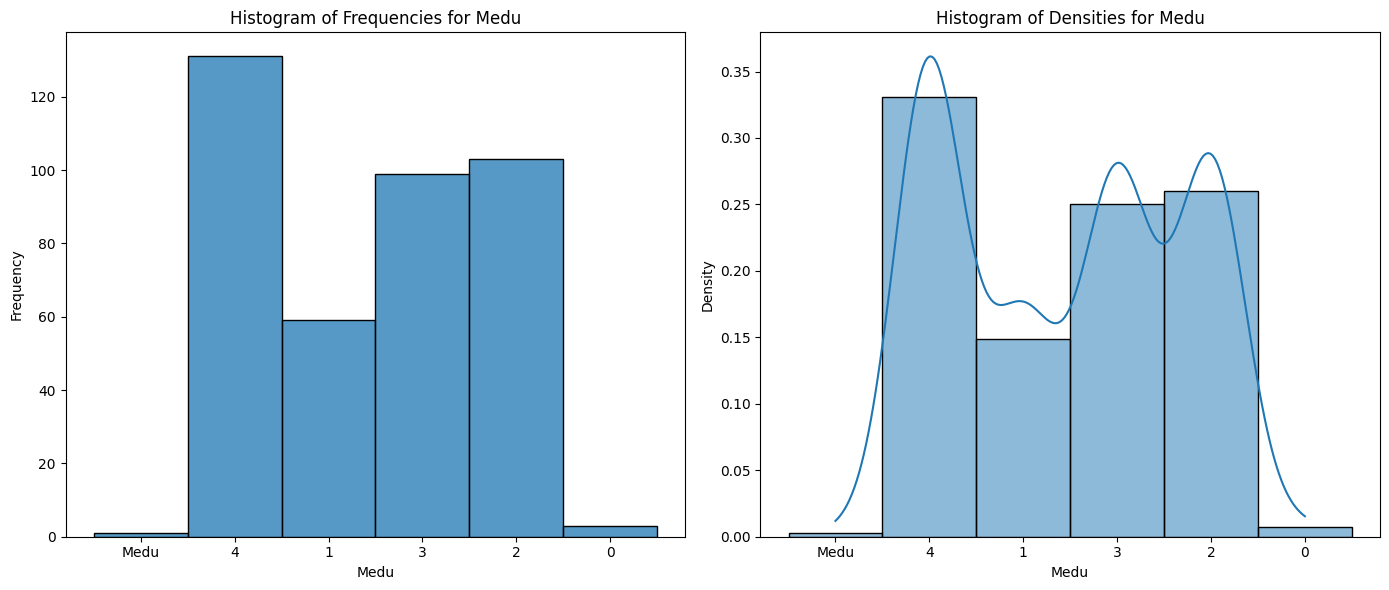

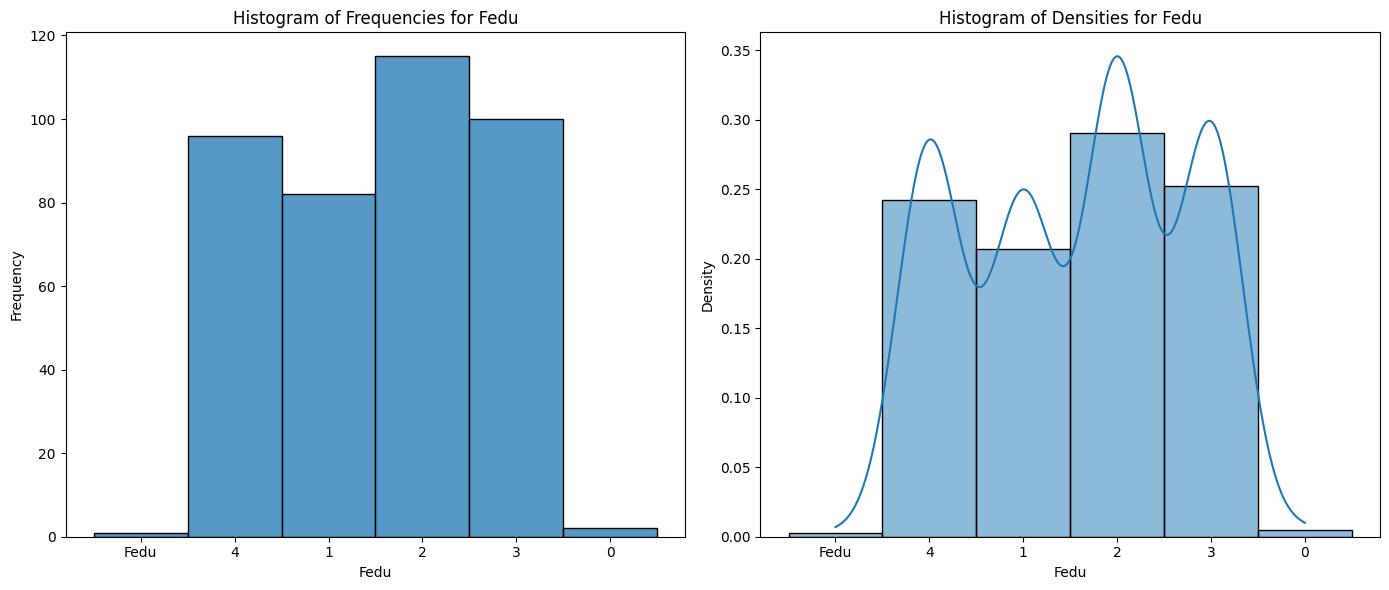

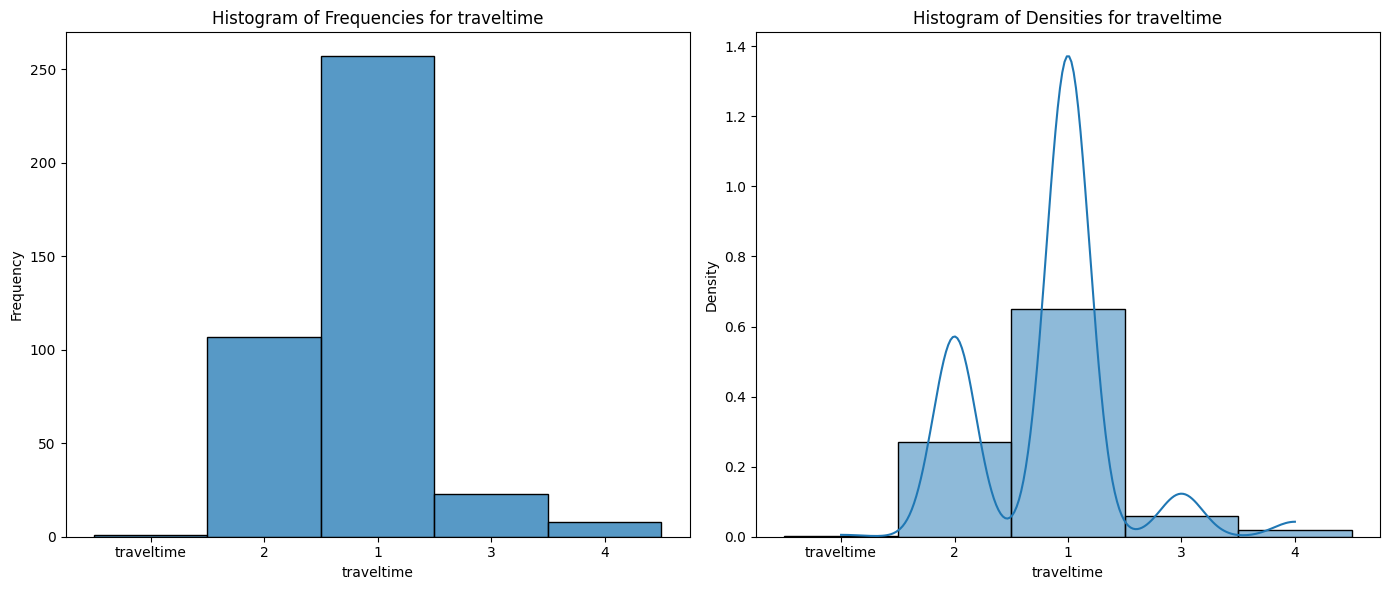

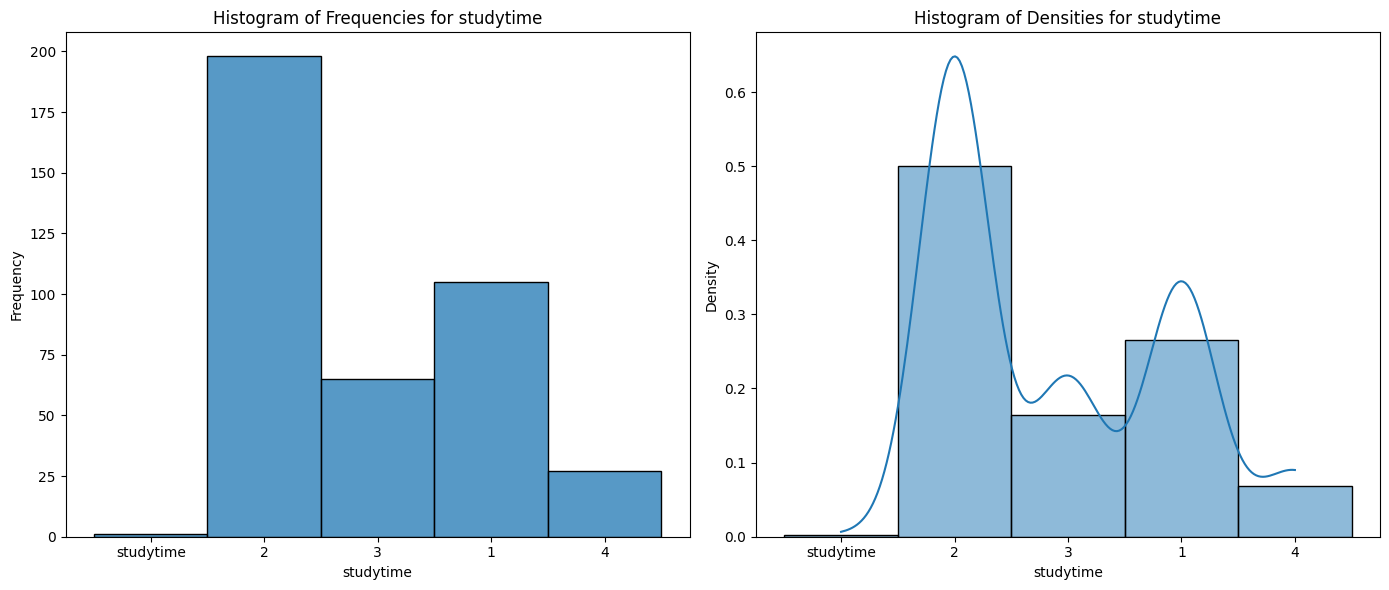

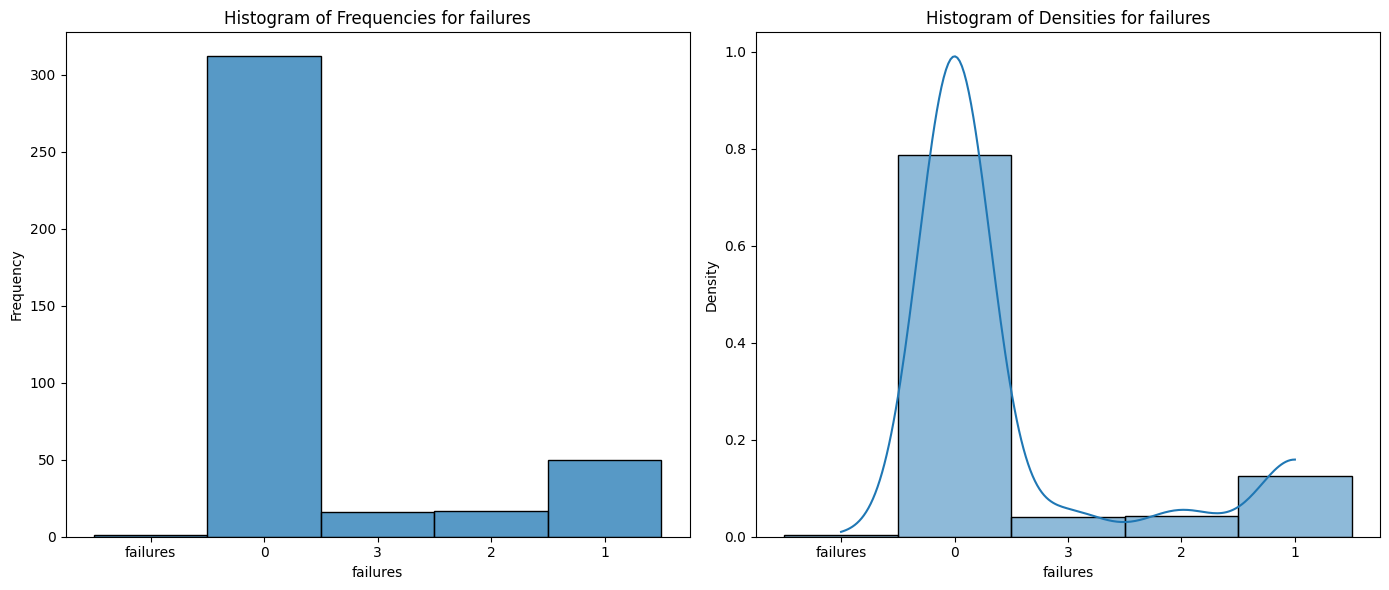

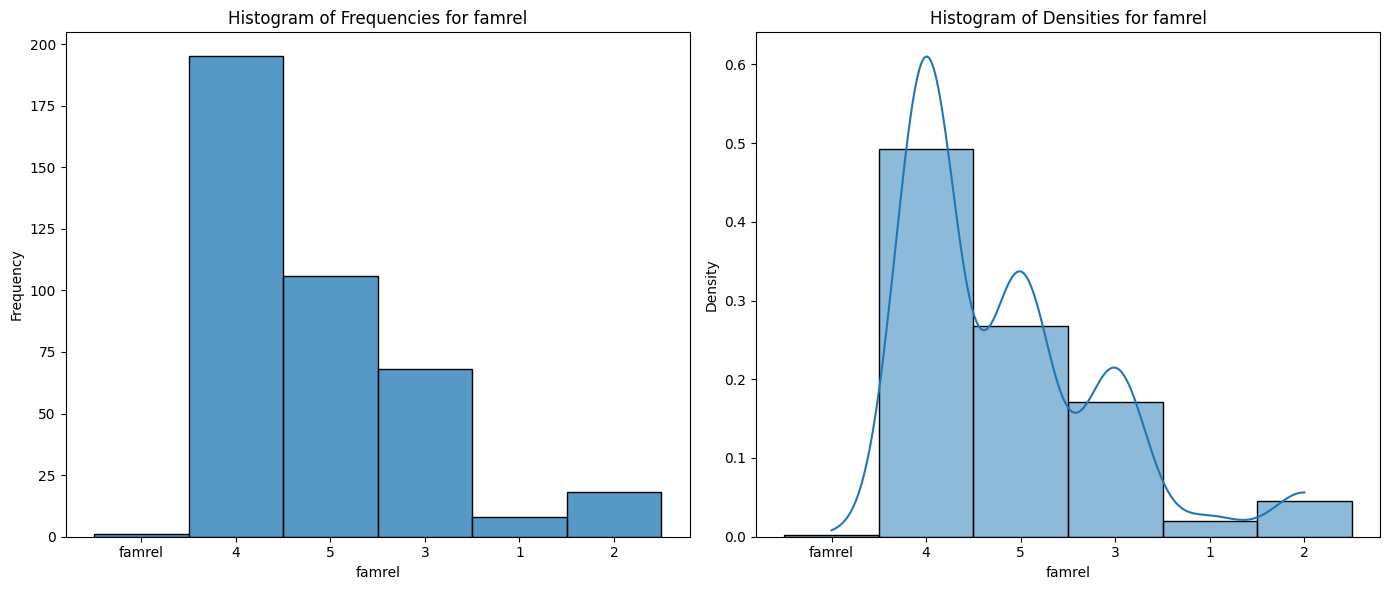

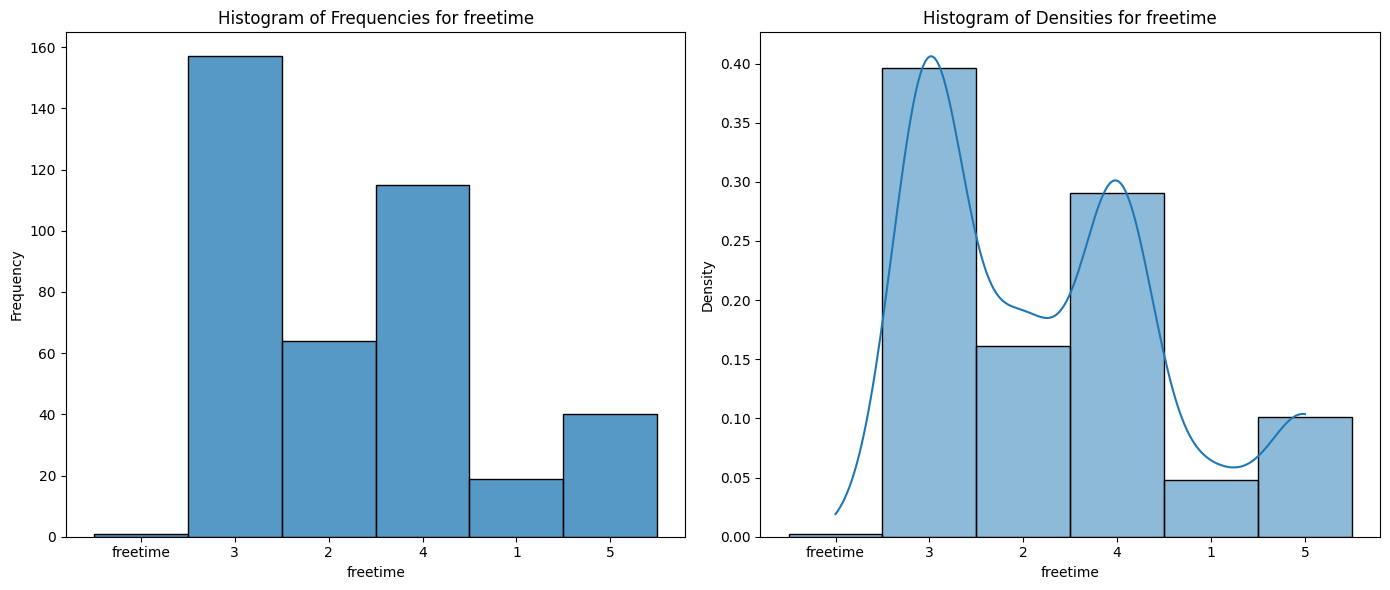

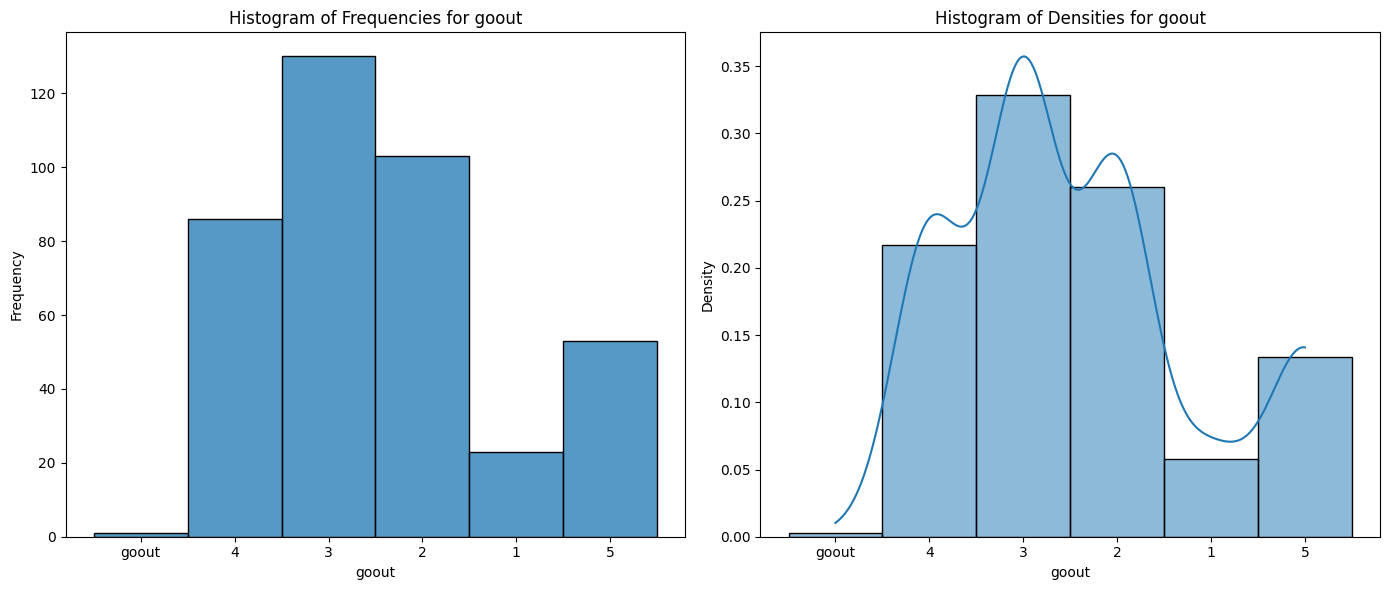

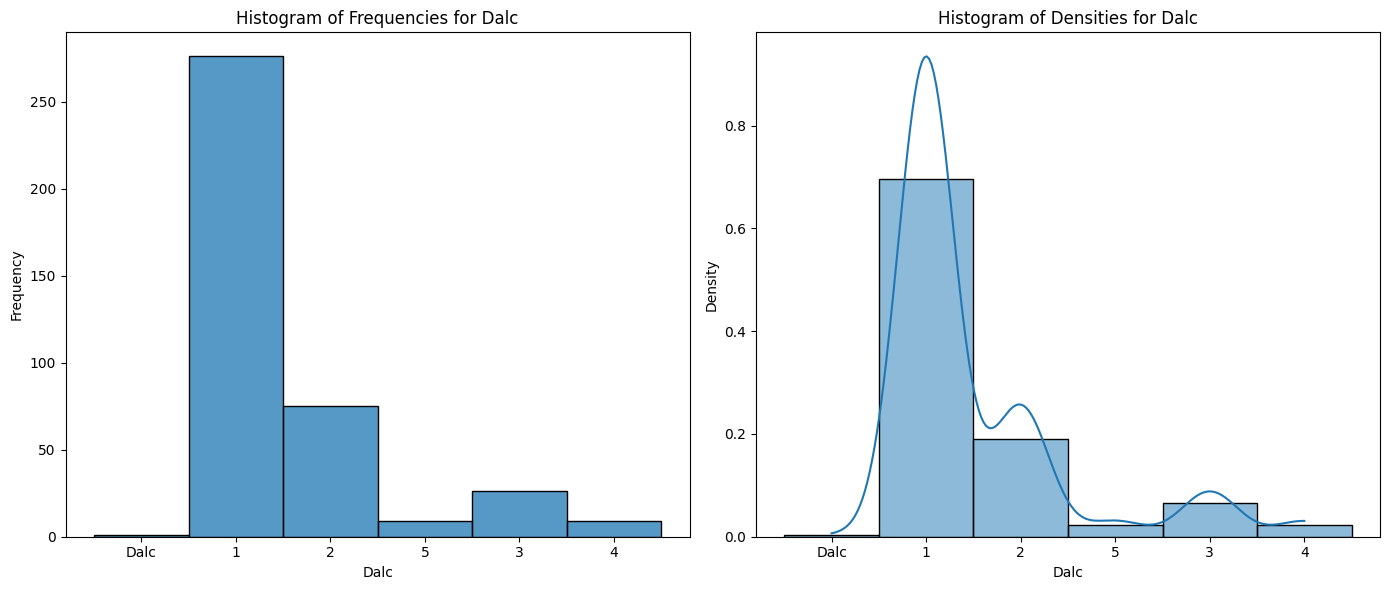

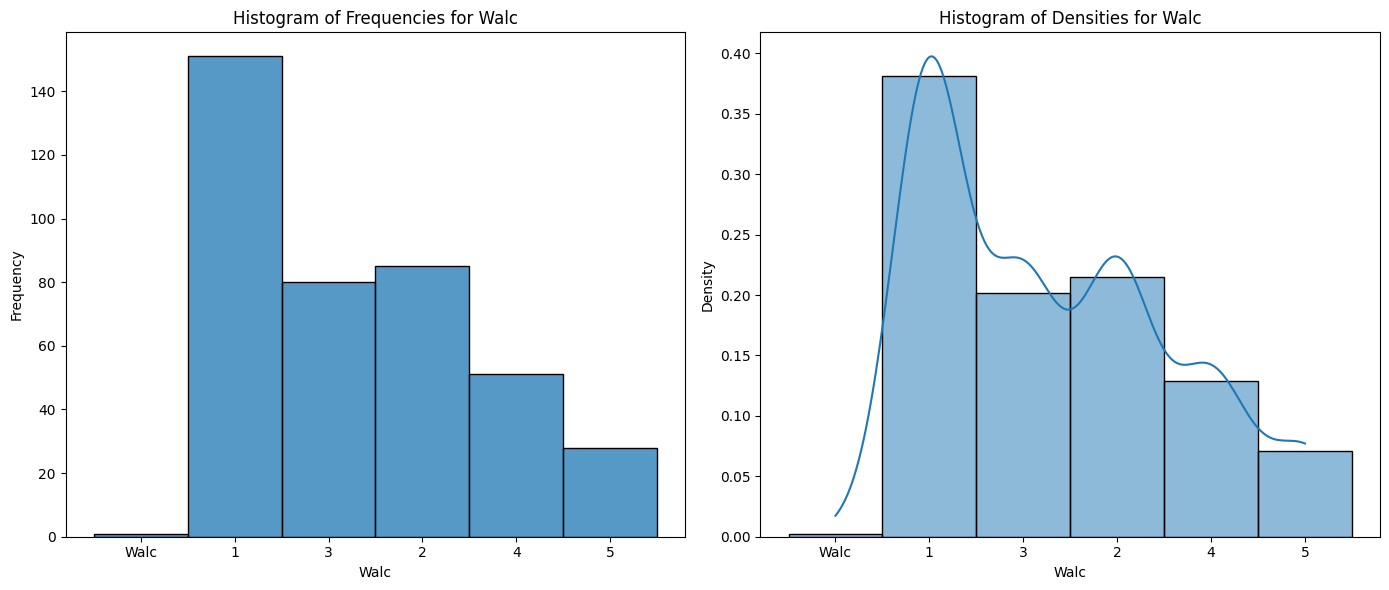

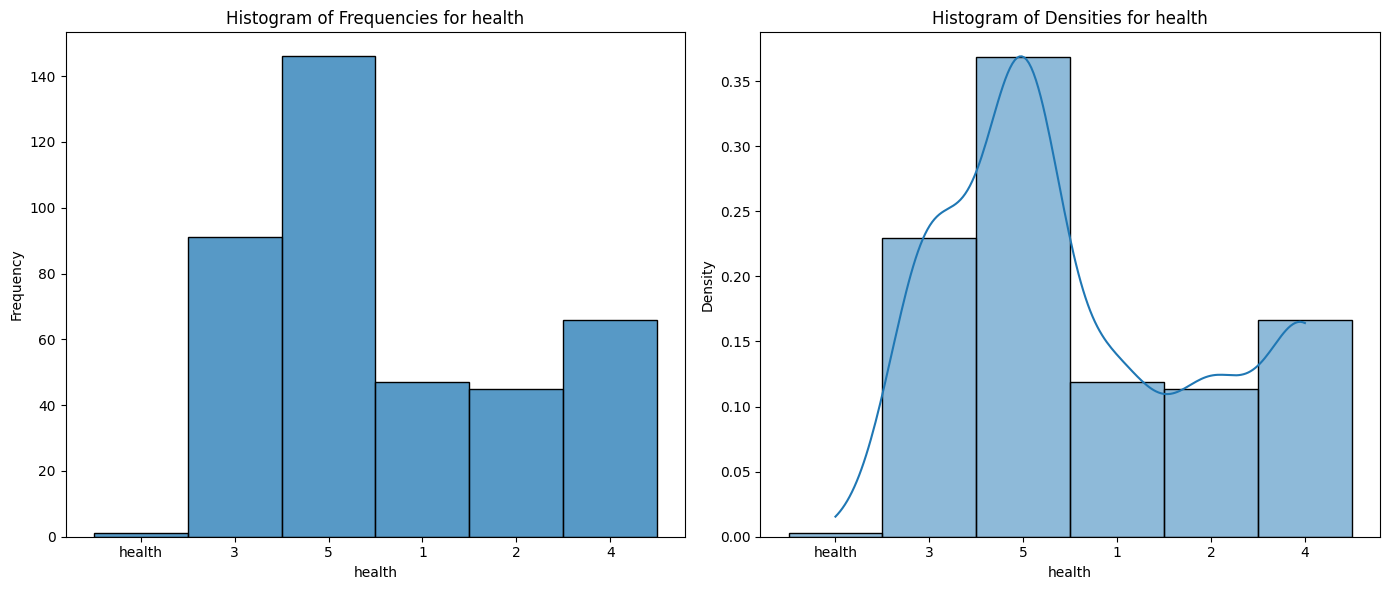

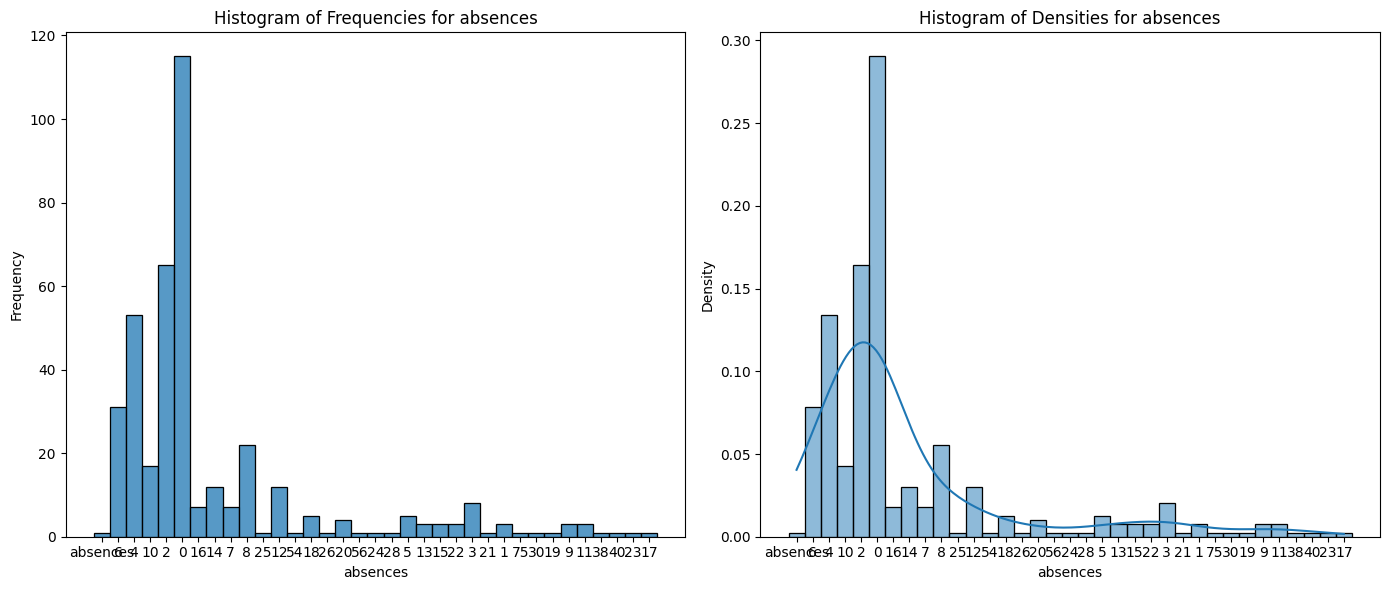

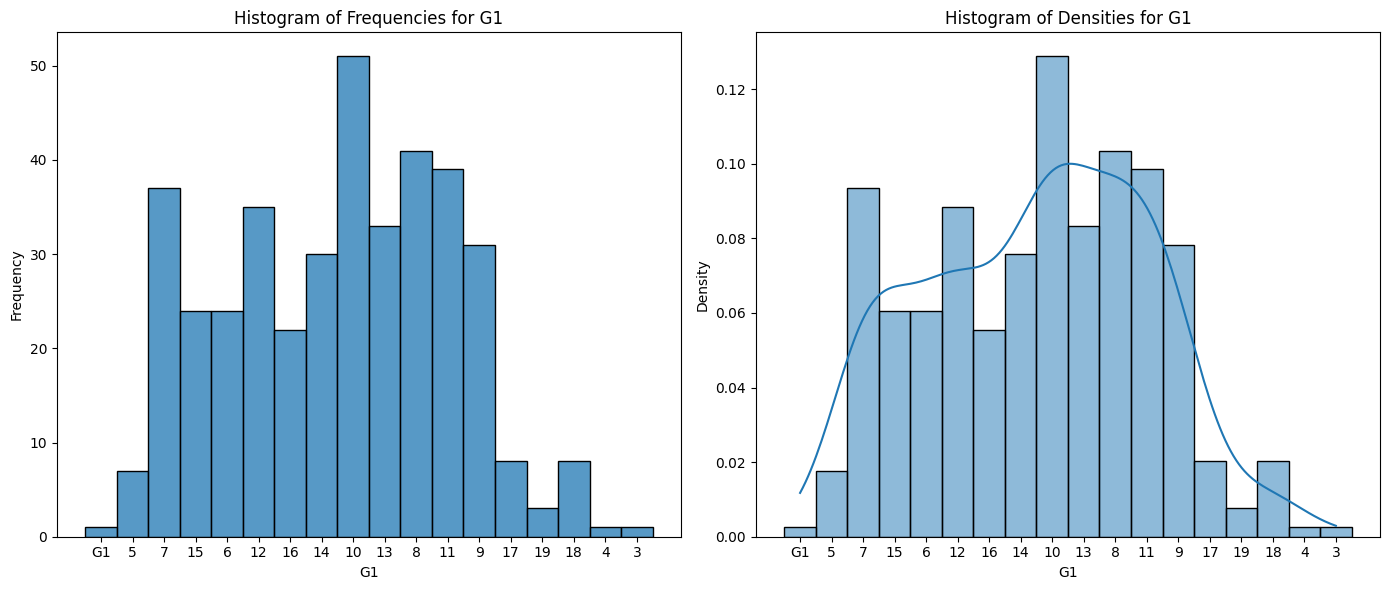

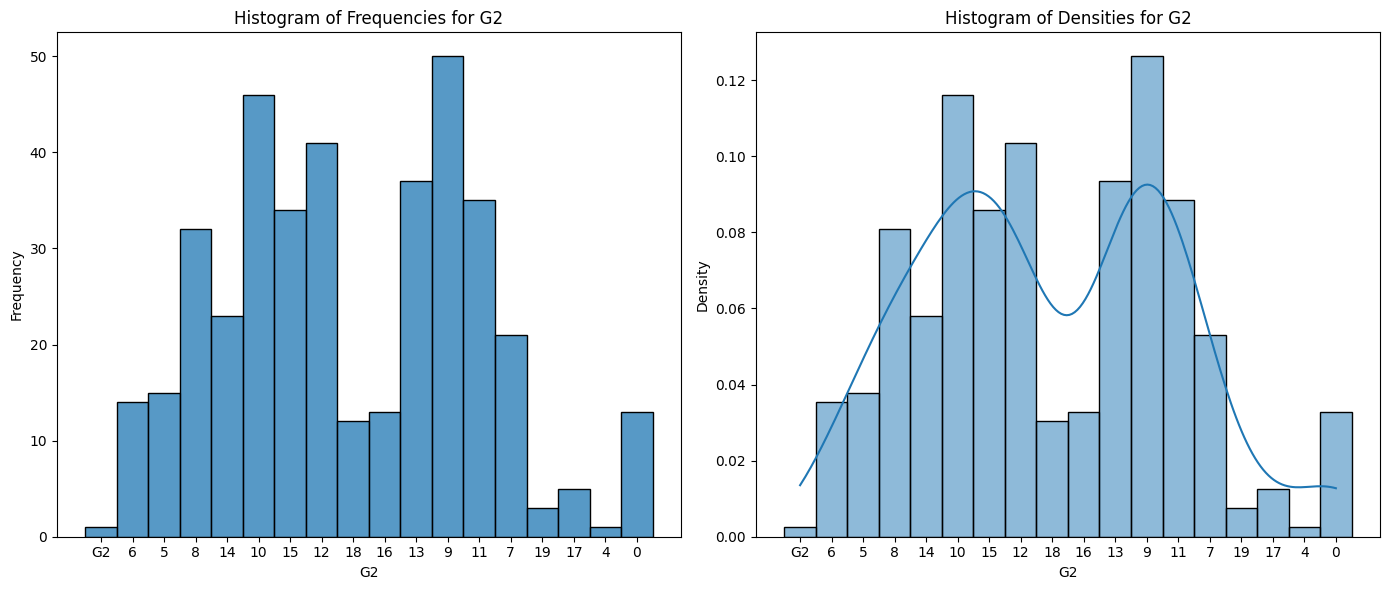

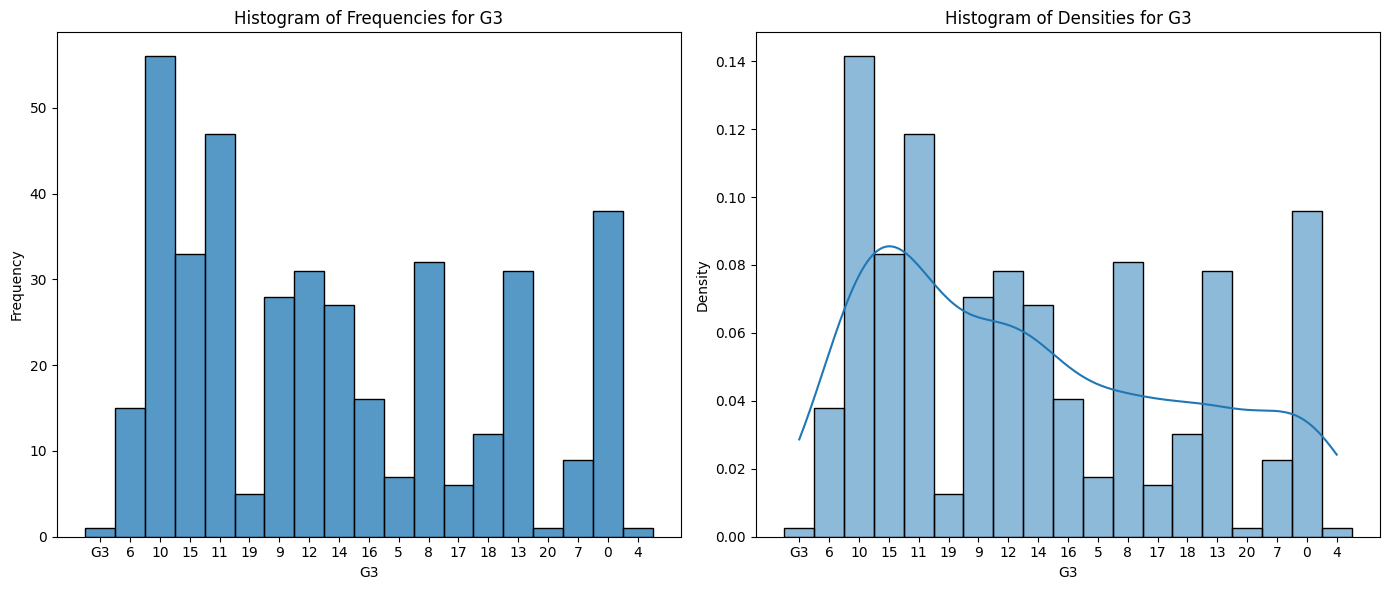

In [50]:

# Call the function to plot the graph for all variables
plot_all_numerical_histograms(dataset)

Box Plot

In [51]:

def statistics_nvar(data, numerical_cols):
    fig, axs = plt.subplots(1, len(numerical_cols), figsize = (16, 4))
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_17280\2065425030.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


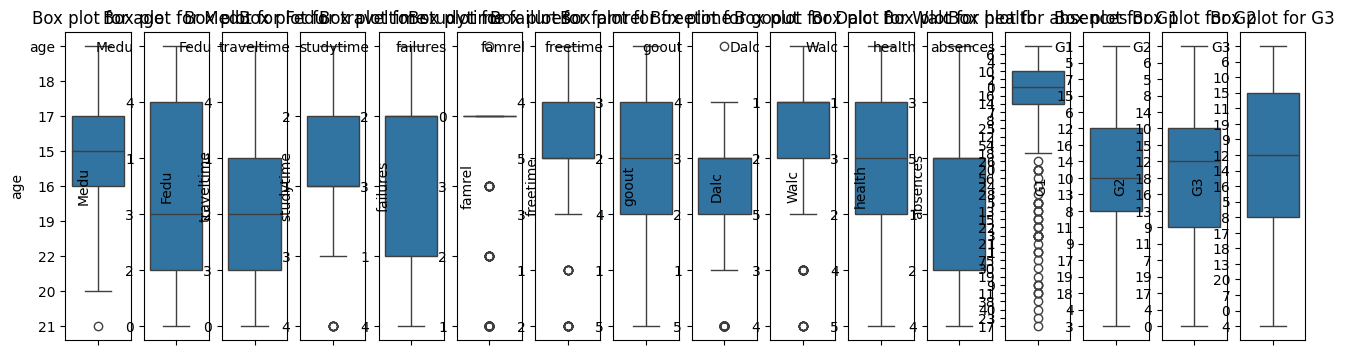

In [52]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [53]:

# statistical information about numerical variables
dataset[numerical_cols].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,396,396,396,396,396,396,396,396,396,396,396,396,396,396,396,396
unique,9,6,6,5,5,5,6,6,6,6,6,6,35,18,18,19
top,16,4,2,1,2,0,4,3,3,1,1,5,0,10,9,10
freq,104,131,115,257,198,312,195,157,130,276,151,146,115,51,50,56


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

![image.png](attachment:image.png)

In [54]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

In [56]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [57]:

call_percentile(z = -2)

2.275

In [62]:
from scipy import stats

def outliers_detection(df, col, lower_percentile=2.275, upper_percentile=97.725):
    # Convert column to numeric, coercing any invalid values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Drop rows with NaN values in the specified column
    df_clean = df.dropna(subset=[col])
    
    # Calculate the percentiles
    lower_bound = df_clean[col].quantile(lower_percentile / 100)
    upper_bound = df_clean[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    return outliers

In [63]:
outliers_detection(dataset, "age").head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
248,GP,M,22.0,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8
307,GP,M,20.0,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18
377,MS,F,20.0,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
391,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
393,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [64]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in age ***
#samples outlier to distribution = 5
%outliers = 1.26 %

*** Outliers detection in Medu ***
#samples outlier to distribution = 3
%outliers = 0.76 %

*** Outliers detection in Fedu ***
#samples outlier to distribution = 2
%outliers = 0.51 %

*** Outliers detection in traveltime ***
#samples outlier to distribution = 8
%outliers = 2.02 %

*** Outliers detection in studytime ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in failures ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in famrel ***
#samples outlier to distribution = 8
%outliers = 2.02 %

*** Outliers detection in freetime ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in goout ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Dalc ***
#samples outlier to distribution = 9
%outliers = 2.27 %

*** Outliers detection in Walc ***
#samples outlier to distrib

In [65]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['guardian',
 'Mjob',
 'nursery',
 'internet',
 'Fjob',
 'higher',
 'reason',
 'famsize',
 'address',
 'schoolsup',
 'romantic',
 'sex',
 'paid',
 'school',
 'activities',
 'famsup',
 'Pstatus']

Count instances for each categorical column

In [66]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** guardian ******
guardian
mother      273
father       90
other        32
guardian      1
Name: count, dtype: int64

***** Mjob ******
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Mjob          1
Name: count, dtype: int64

***** nursery ******
nursery
yes        314
no          81
nursery      1
Name: count, dtype: int64

***** internet ******
internet
yes         329
no           66
internet      1
Name: count, dtype: int64

***** Fjob ******
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Fjob          1
Name: count, dtype: int64

***** higher ******
higher
yes       375
no         20
higher      1
Name: count, dtype: int64

***** reason ******
reason
course        145
home          109
reputation    105
other          36
reason          1
Name: count, dtype: int64

***** famsize ******
famsize
GT3        281
LE3        114
famsize      1
Name: count, dtype: int64

***** address ******
address
U       

Bar chart - Analysis of absolute frequencies

In [67]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

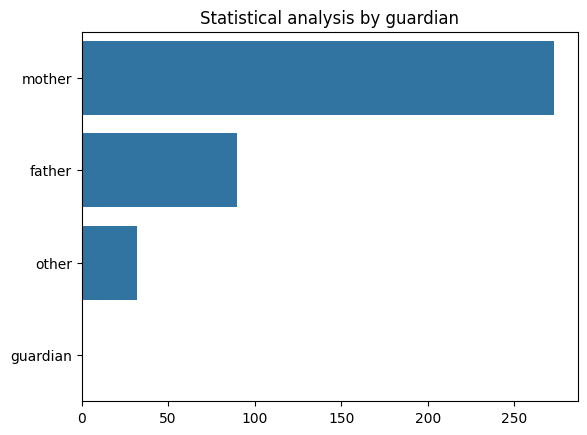

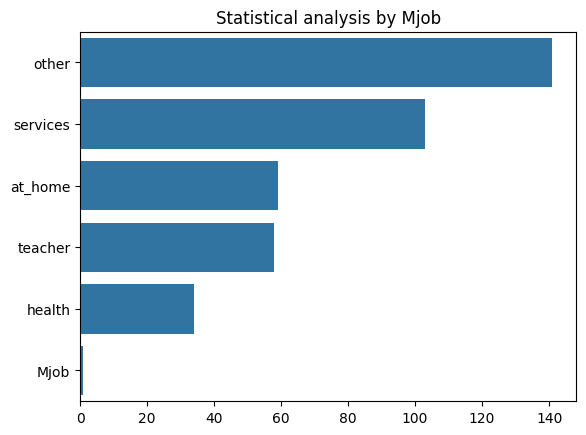

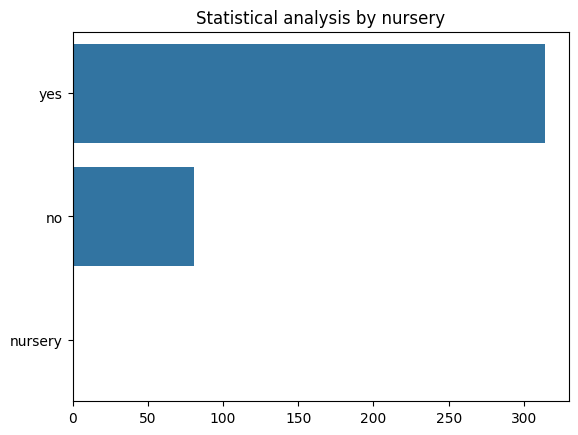

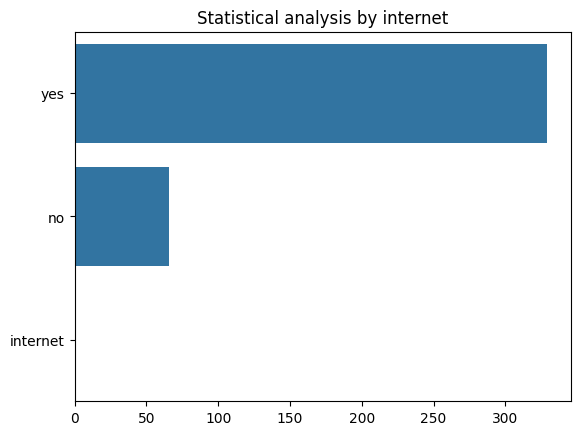

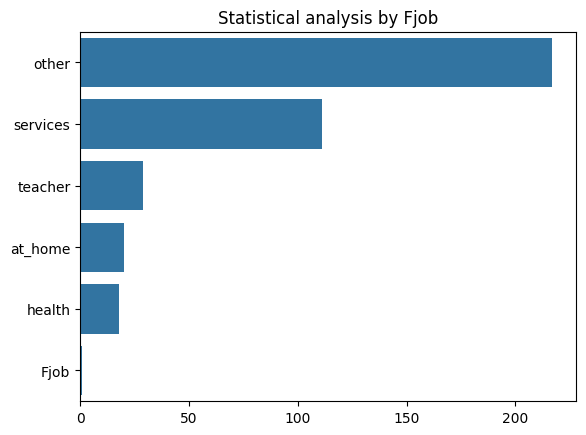

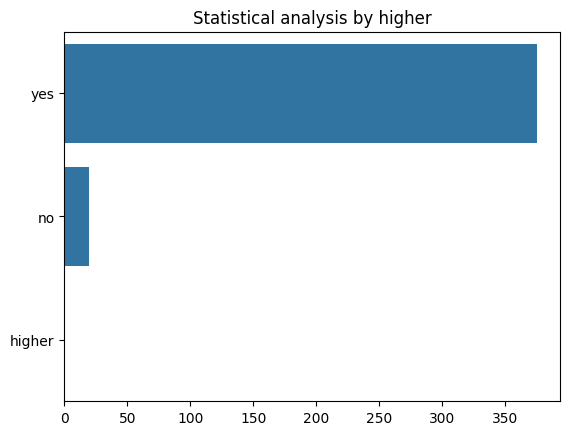

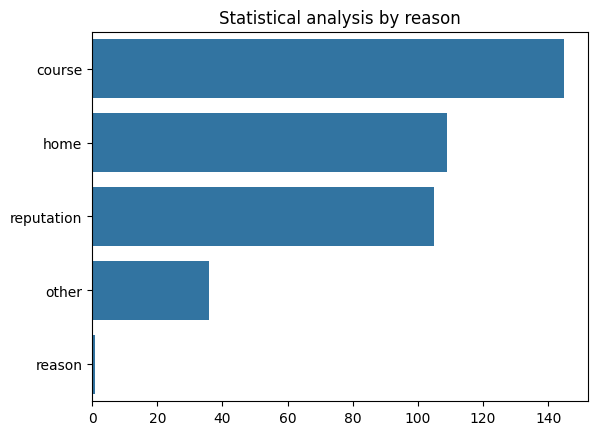

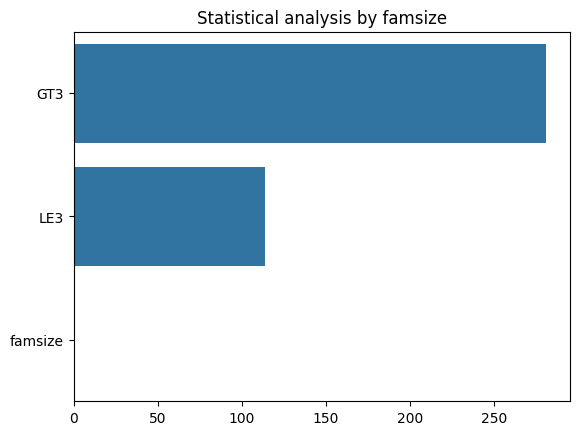

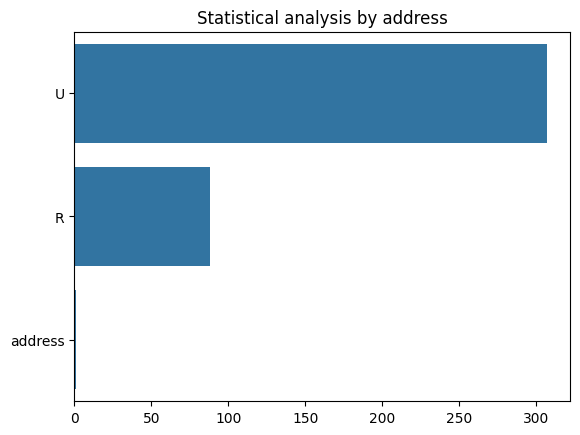

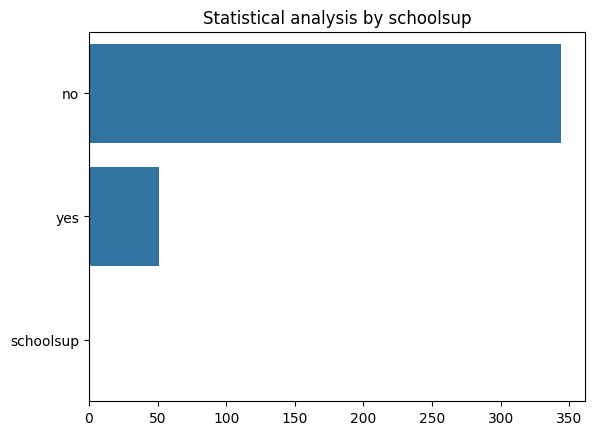

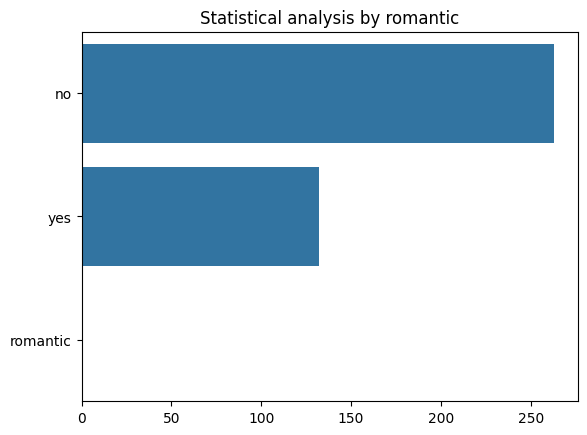

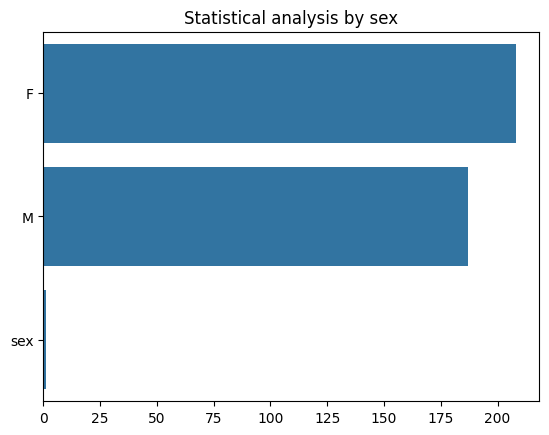

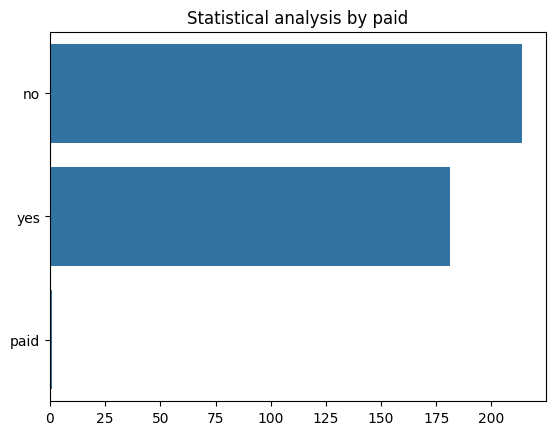

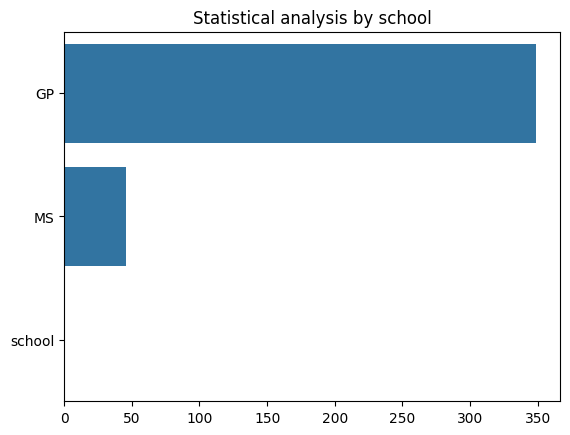

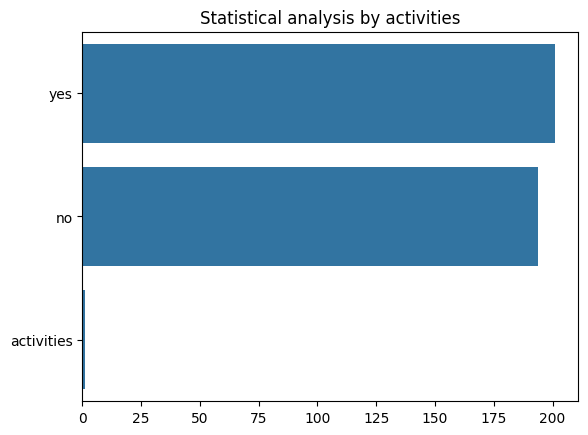

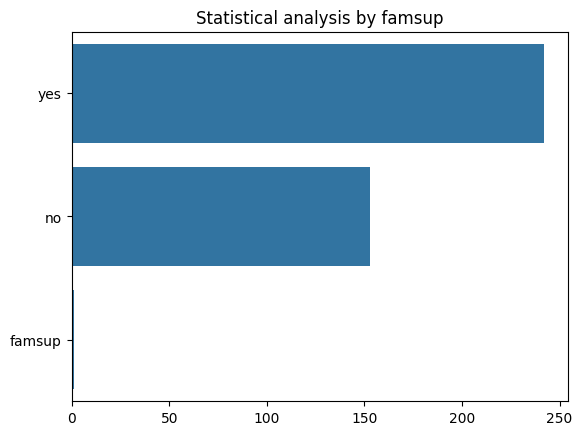

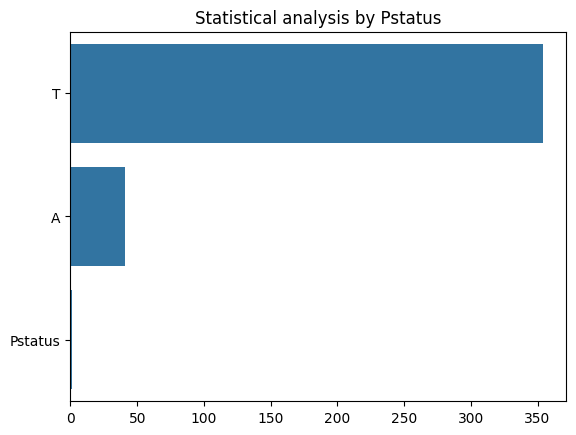

In [68]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Pie Chart - Analysis of relative frequencies

In [69]:

# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

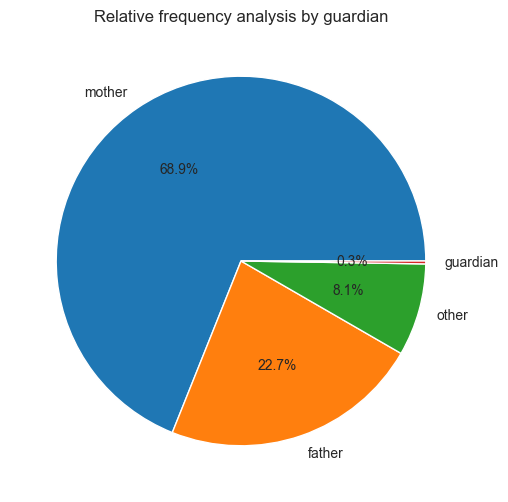

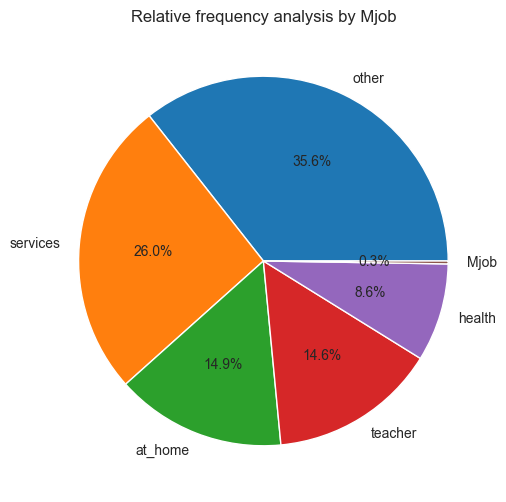

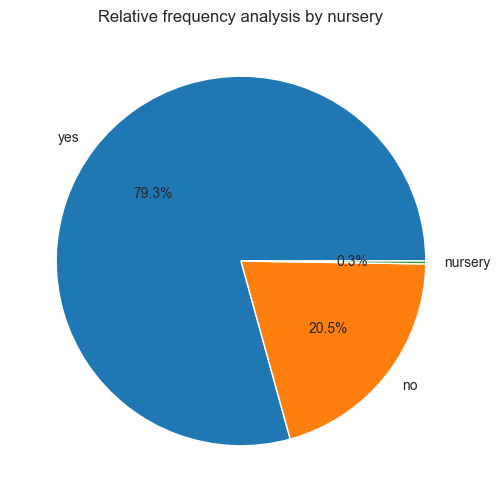

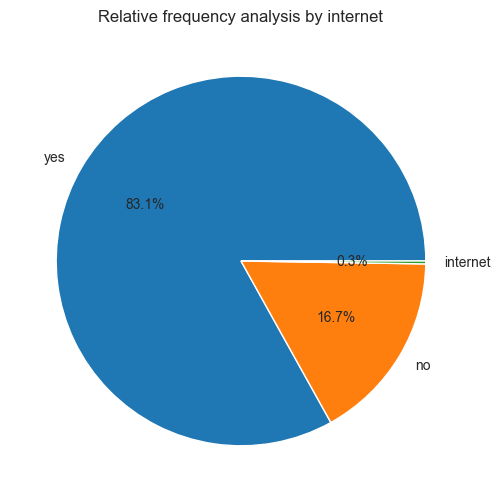

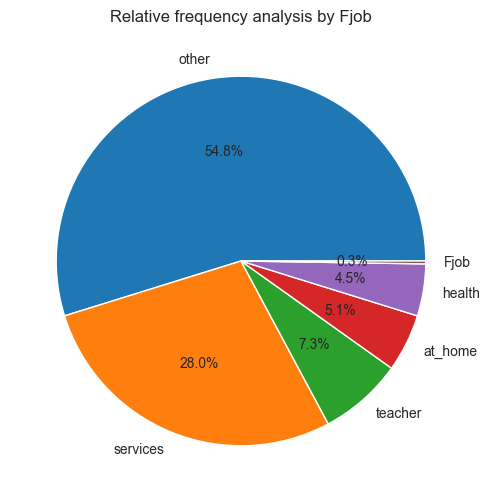

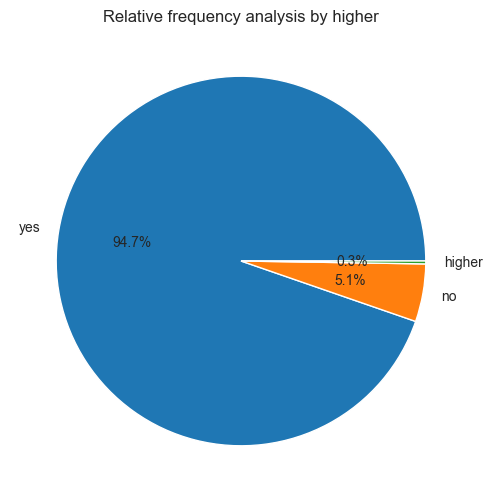

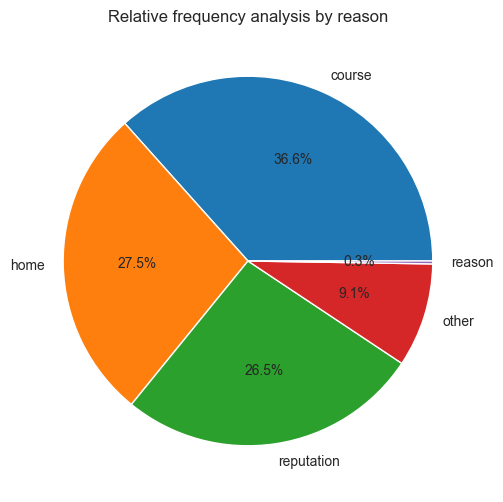

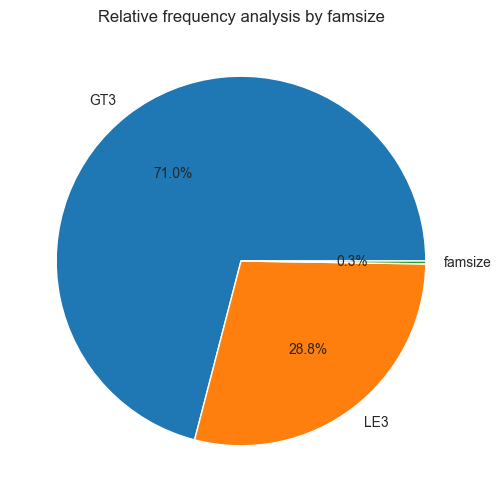

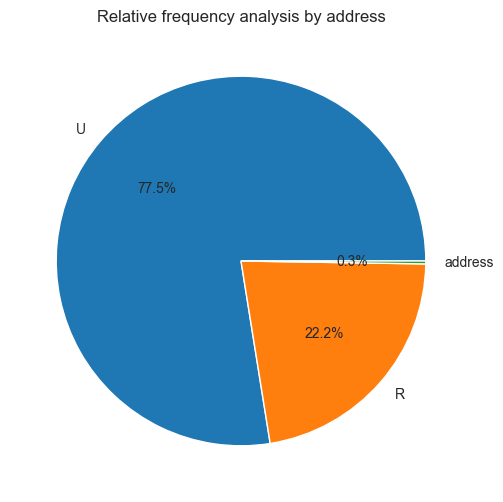

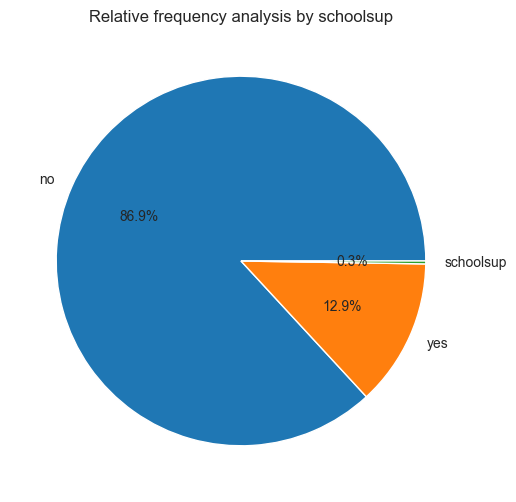

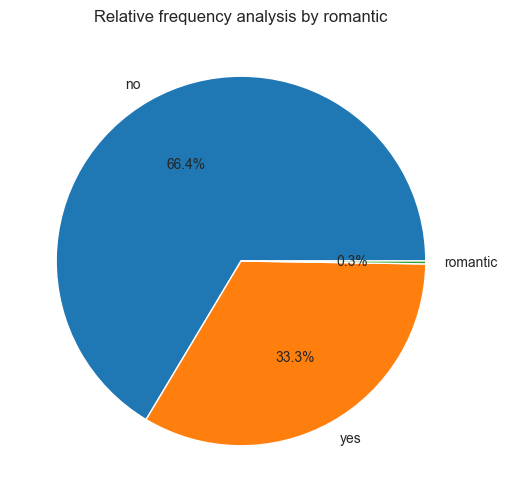

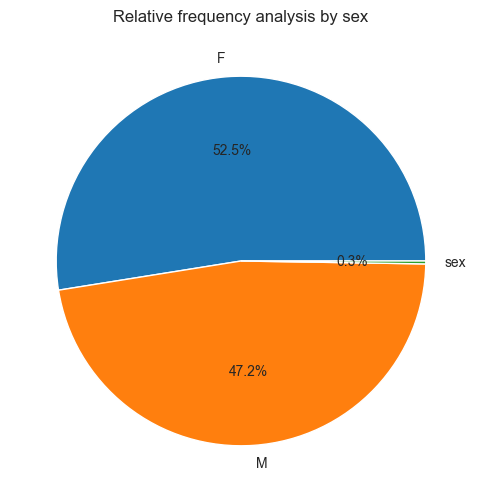

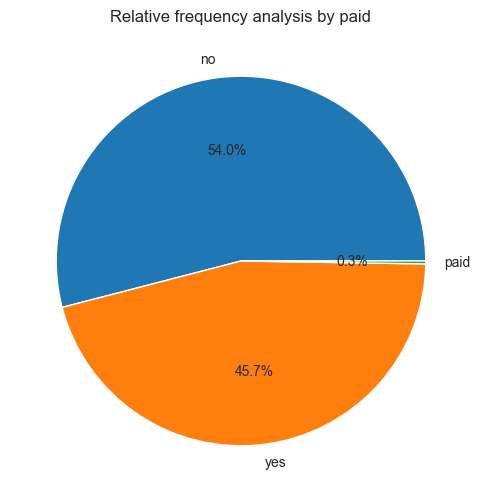

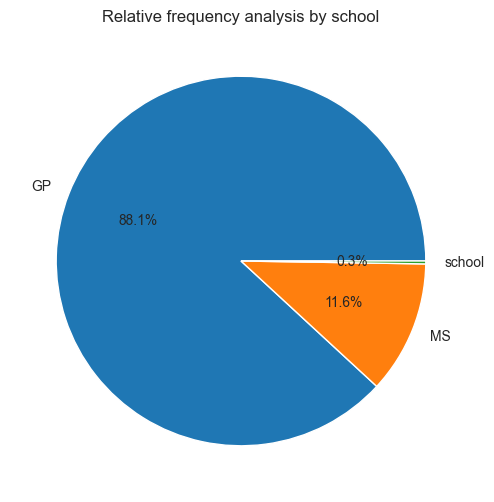

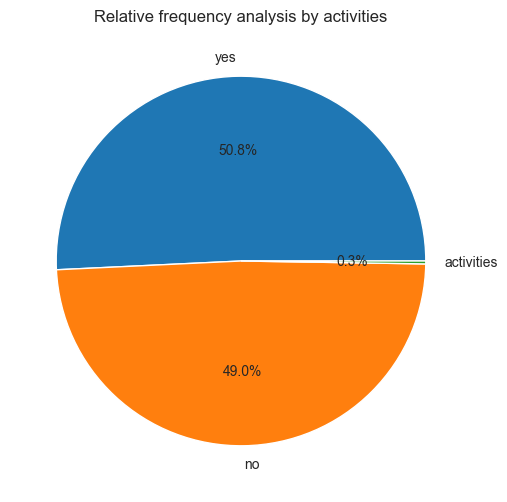

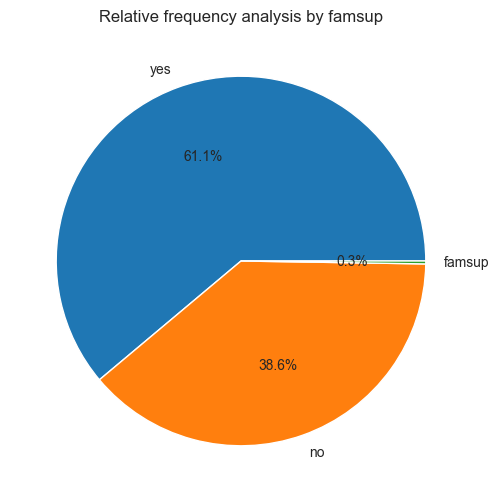

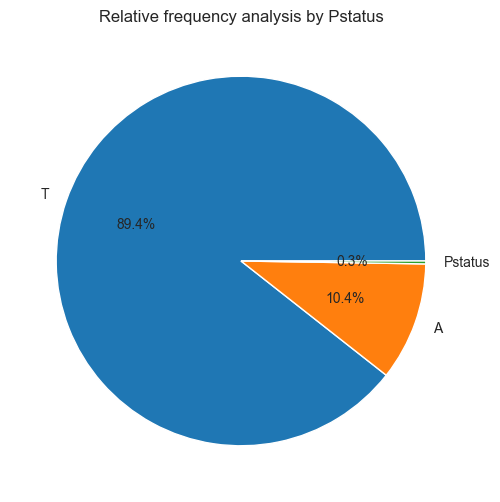

In [70]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups 

In [74]:
# create groups organized by sex and income
group_sex_income = dataset.groupby(["sex", "address"]).size().reset_index(name = "samples")
print(group_sex_income)

   sex  address  samples
0    F        R       44
1    F        U      164
2    M        R       44
3    M        U      143
4  sex  address        1


In [75]:

# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    plt.figure(figsize=(15, 6))
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('sex')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by sex and address')
    plt.tight_layout()
    plt.show()

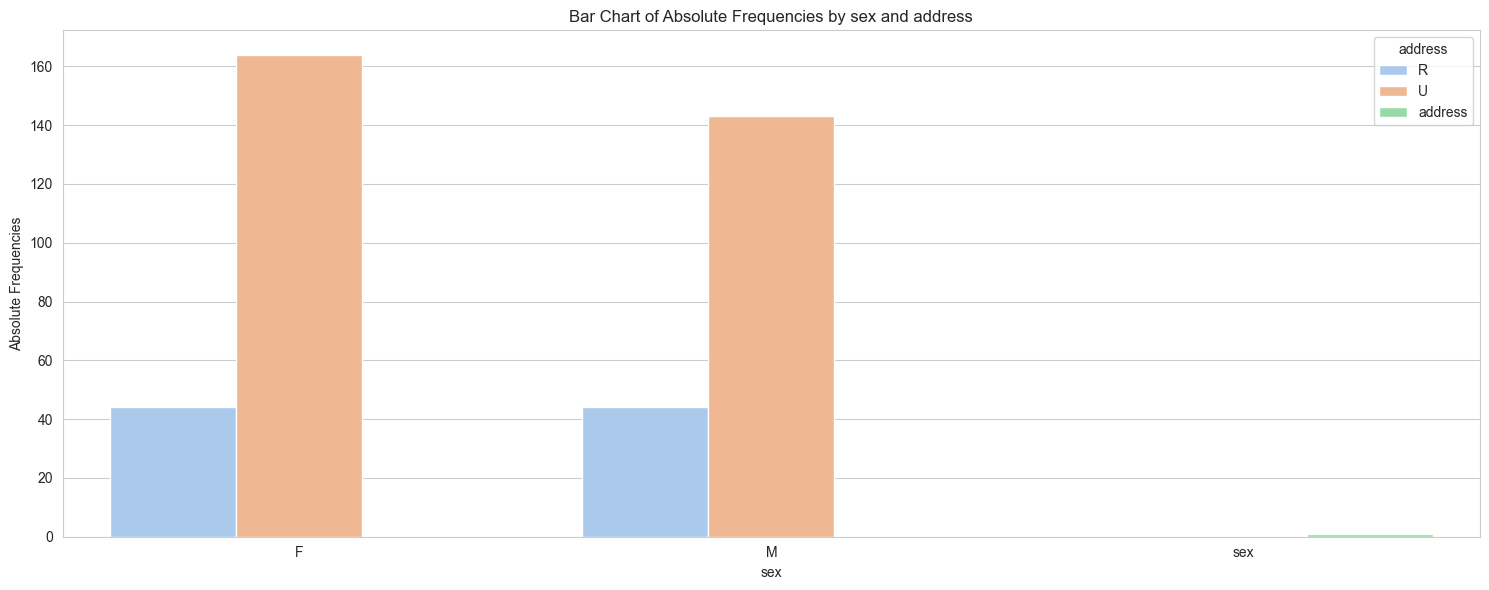

In [76]:
plot_absfreq_groups(group_sex_income, "sex", "address")

In [79]:

# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with salary " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by sex and address')
    plt.show()

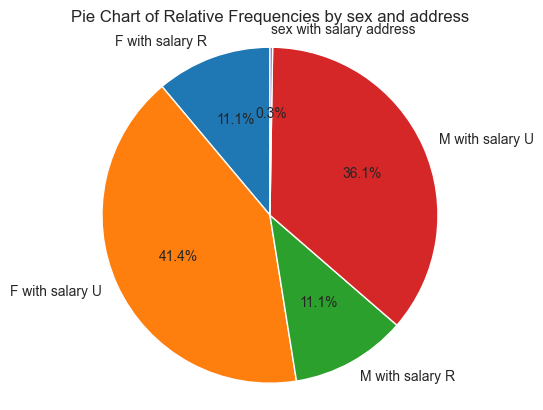

In [80]:

plot_relfreq_groups(group_sex_income, "sex", "address")